# 1. 데이터 셋팅 및 내용 확인

In [2]:
import pandas as pd

train_df = pd.read_csv('./datas/train.csv') # 학습용 데이터
test_df = pd.read_csv('./datas/test.csv') # 테스트용 데이터

In [2]:
# 학습 데이터 기본 정보 확인
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


|#|컬럼명|내용|설명|
|-|------|---|---|
|0|PassengerId  |각 승객의 고유 번호||
|1|Survived     |생존 여부|0: 사망, 1: 생존|
|2|Pclass       |객실 등급|1, 2, 3|
|3|Name         |이름||
|4|Sex          |성별||
|5|Age          |나이||
|6|SibSp|형제자매 및 배우자 수||
|7|Parch        |부모 자식 수||
|8|Ticket       |티켓 넘버||
|9|Fare         |티켓 요금||
|10|Cabin        |객실 번호||
|11|Embarked     |승선 항구|C: Cherbourg, Q: Queenstown, S: Southampton|
- 학습용 데이터에는 총 12개의 컬럼(특성, feature)이 있는 것으로 확인

In [156]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


- 테스트용 데이터에는 Survived 특성이 없는것으로 확인
- 생존에 영향을 주는 데이터가 무엇인지 확인할 필요가 있음

In [157]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [158]:
# 학습 데이터 통계 출력 (int, float만 확인 가능)
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- 수치로 확인되기 때문에 히스토그램으로 내용을 확인할 수 있음

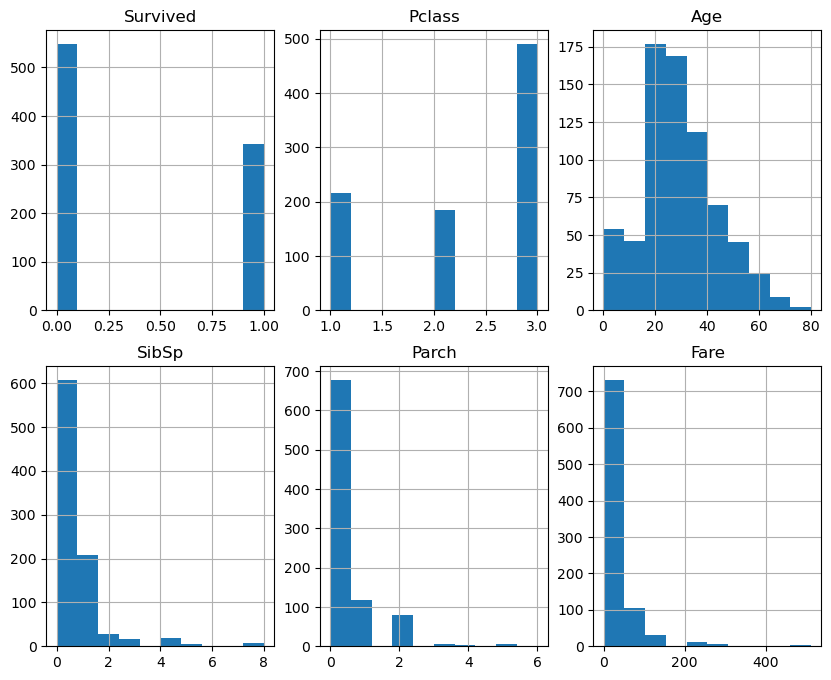

In [159]:
import matplotlib.pyplot as plt
columns = ['Survived','Pclass','Age','SibSp','Parch','Fare']
plt.figure(figsize=(10,8))

for i in range(6):
    plt.subplot(2,3,i+1)
    plt.title(str(columns[i]))
    train_df[str(columns[i])].hist()
plt.show()

In [160]:
# 학습 세트 통계 출력 (object)
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [161]:
# null 값 확인
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# 2. 데이터 전처리 (학습용 데이터)
## 2-1. null값 처리

### 2-1-1. Age 특성
- Age에는 177개의 null값이 있음.
- 하지만 구간으로 구분되어 있지 않기 때문에 특정 값을 넣어주는데 한계가 있다고 생각
- Name 컬럼의 호칭(Mr. ... )을 활용하여 Age의 구간화에 활용하고자 함

## 2-2. 컬럼 추가
### 2-2-1. Title 컬럼
- Name 컬럼의 호칭을 추출하여 Title 컬럼 새로 생성

In [162]:
train_df['Name'].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

- [Mr.], [Mrs.], [Miss.] 등이 있는 것을 확인

In [3]:
# 알파벳으로 되어 있고, 각 호칭이 '.' 으로 끝나는 패턴 추출
train_df['Title'] = train_df.Name.str.extract('([A-Za-z]+)\.', expand = False)

In [40]:
train_df['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

- 17개의 속성이 있는 것을 확인
- Mile, Ms는 여성 지칭 호칭(Miss)으로, Mme는 Mrs로 변경
- 추가로 소수(10개 미만의 속성, ex. Dr, Rev ..)의 속성은 Rare로 변경

In [4]:
train_df['Title'] = train_df['Title'].replace(['Mlle', 'Ms'], 'Miss')
train_df['Title'] = train_df['Title'].replace(['Mme'], 'Mrs')
train_df['Title'] = train_df['Title'].replace(['Dr', 'Rev', 'Major', 'Col', 'Countess', 'Capt', 'Sir', 'Lady', 'Don', 'Jonkheer'], 'Rare')

In [166]:
train_df['Title'].value_counts()

Mr        517
Miss      185
Mrs       126
Master     40
Rare       23
Name: Title, dtype: int64

In [5]:
# Age 컬럼 null 값 채우기
# Title 컬럼을 기준으로 Age 컬럼을 그룹화 후 중앙값 추출
train_df[['Title','Age']].groupby(['Title']).median()

,Age
Title,
Master,3.5
Miss,21.0
Mr,30.0
Mrs,35.0
Rare,48.5


In [6]:
# 해당 값을 Age 컬럼의 대표값으로 생각하고 null 값 채우기
train_df['Age'].fillna(train_df.groupby('Title')['Age'].transform('median'), inplace=True)

In [171]:
print(train_df['Age'].isnull().sum())

0


### 2-1-2. Cabin 특성
- Cabin에는 687개의 null 값이 있음.
- 객실 번호는 생존여부에 영향을 미치지 않을거라는 판단하에 삭제.

In [7]:
train_df.drop(['Cabin'], axis=1, inplace=True)

### 2-1-3. Embarked 특성
- Embarked에는 2개의 null값이 있음.

In [173]:
train_df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [8]:
# 대다수가 S 이기 때문에 우선 S로 바꿔주기로 결정.
# 단순히 항구이름을 표기하기 때문에 대체해도 된다고 판단.
train_df['Embarked'].fillna('S', inplace=True)

In [175]:
print(train_df['Embarked'].value_counts())
print(train_df['Embarked'].isnull().sum())

1    646
2    168
3     77
Name: Embarked, dtype: int64
0


- null 값을 가장 많은 값으로 대체 후 int형으로 변환함

### 2-2-2. AgeBand 컬럼
- 기존 Age 컬럼은 구간화가 되어 있지 않기 때문에 생존 확률과 비교하기에 용이 하지 않음
- 이를 10대, 20대.. 등으로 구간화 하기로 함

In [9]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 8) # Age를 8개 구간으로 나눔

In [177]:
train_df['AgeBand'].head()

0    (20.315, 30.263]
1     (30.263, 40.21]
2    (20.315, 30.263]
3     (30.263, 40.21]
4     (30.263, 40.21]
Name: AgeBand, dtype: category
Categories (8, interval[float64, right]): [(0.34, 10.368] < (10.368, 20.315] < (20.315, 30.263] < (30.263, 40.21] < (40.21, 50.158] < (50.158, 60.105] < (60.105, 70.052] < (70.052, 80.0]]

- 식별에 용이하게 라벨링 해주기로 함

In [10]:
train_df['AgeBand'] = pd.cut(train_df['Age'], bins=8, labels=['child','10s','20s','30s','40s','50s','60s','70s']) 

In [48]:
train_df['AgeBand'].head()

0    20s
1    30s
2    20s
3    30s
4    30s
Name: AgeBand, dtype: category
Categories (8, object): ['child' < '10s' < '20s' < '30s' < '40s' < '50s' < '60s' < '70s']

### 2-2-3. Family 컬럼
- 기존 컬럼중에 SibSp, Parch는 각각 형제자매와 배우자 수, 부모 자녀 수를 나타냄
- 가족의 수가 생존여부에 미칠 수 있다고 생각하여 Family 컬럼 추가

In [11]:
train_df['Family'] = train_df['SibSp'] + train_df['Parch'] + 1 # 1은 나 자신을 추가해야 하기 때문

### 2-2-4. Alone 컬럼
- 혼자인 경우 생존률이 오히려 높지 않을까 라는 생각에 추가
- Family 컬럼의 수가 0인 경우로 새롭게 생성

In [12]:
train_df['Alone'] = 'Not Alone' # 기본값 혼자가 아님
train_df.loc[train_df['Family']==1, 'Alone'] = 'Alone' # 부양가족수가 1이라면 'Alone' 반환

### 2-2-5. FareBand 컬럼
- 기존 Fare 컬럼은 Age 컬럼과 마찬가지로 구간화가 되어 있지 않음
- AgeBand와 마찬가지로 금액에 라벨링 하기로 함

In [13]:
train_df['FareBand'] = pd.cut(train_df['Fare'], 5) # 5개 구간으로 나눔

In [183]:
train_df['FareBand'].head()

0    (-0.512, 102.466]
1    (-0.512, 102.466]
2    (-0.512, 102.466]
3    (-0.512, 102.466]
4    (-0.512, 102.466]
Name: FareBand, dtype: category
Categories (5, interval[float64, right]): [(-0.512, 102.466] < (102.466, 204.932] < (204.932, 307.398] < (307.398, 409.863] < (409.863, 512.329]]

In [14]:
train_df['FareBand'] = pd.cut(train_df['Fare'], bins=5, labels=['100','200','300','400','500']) 

In [185]:
train_df['FareBand'].head()

0    100
1    100
2    100
3    100
4    100
Name: FareBand, dtype: category
Categories (5, object): ['100' < '200' < '300' < '400' < '500']

## 2-3. 컬럼 삭제
### 2-3-1. PassengerId, Name, Age, SibSp, Parch, Fare, Ticket 컬럼 삭제
- 상기 컬럼들은 객실 번호와 마찬가지로 생존에 영향을 미치지 않을 거나 다른 컬럼으로 대체했기 때문에 삭제

In [15]:
train_df.drop(['PassengerId', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare'], axis=1, inplace=True)

In [54]:
# 최종 데이터 프레임 확인
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    int64   
 1   Pclass    891 non-null    int64   
 2   Sex       891 non-null    object  
 3   Embarked  891 non-null    object  
 4   Title     891 non-null    object  
 5   AgeBand   891 non-null    category
 6   Family    891 non-null    int64   
 7   Alone     891 non-null    object  
 8   FareBand  891 non-null    category
dtypes: category(2), int64(3), object(4)
memory usage: 51.2+ KB


# 3. 데이터 분석
## 3-1. 각 컬럼(특성)에 따른 생존율 비교
### 3-1-1. Pclass 에 따른 비교

<AxesSubplot: xlabel='Pclass'>

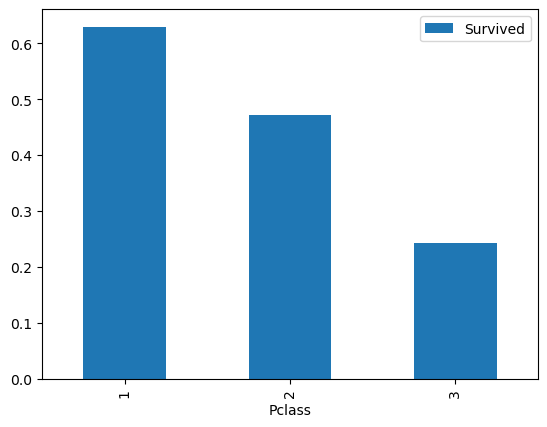

In [188]:
# Pclass를 기준으로 하여 그룹화.
# mean: 개체값의 평균 확인
a = train_df[['Pclass','Survived']].groupby(['Pclass'], as_index=False).mean()
a.plot('Pclass', kind='bar')

- 객실 등급이 좋을 수록 생존률이 높음

### 3-1-2. Sex에 따른 생존율 비교

<AxesSubplot: xlabel='Sex'>

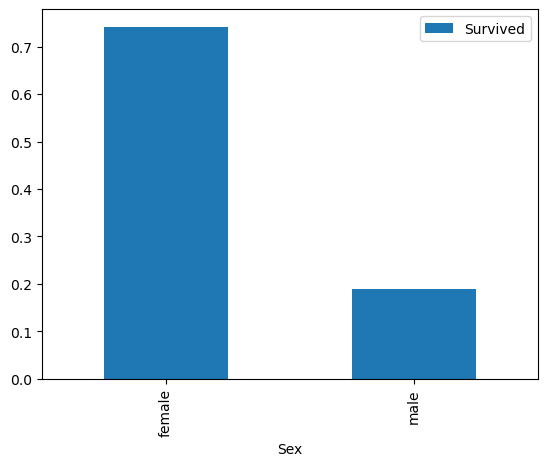

In [189]:
a = train_df[['Sex','Survived']].groupby(['Sex'], as_index=False).mean()
a.plot('Sex', kind='bar')

- 여성의 생존율이 남성보다 높음

### 3-1-3. Embarked(승선항구)에 따른 생존율 비교

<AxesSubplot: xlabel='Embarked'>

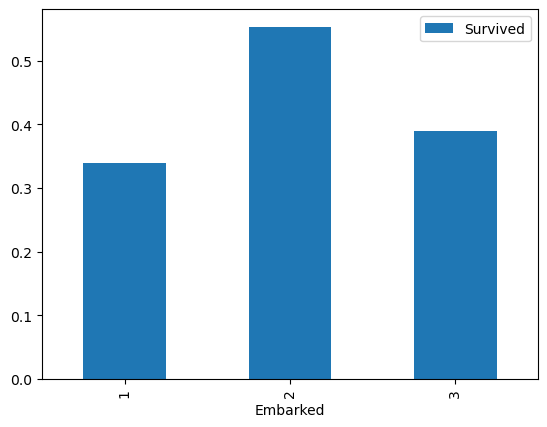

In [196]:
a = train_df[['Embarked','Survived']].groupby(['Embarked'], as_index=False).mean()
a.plot('Embarked', kind='bar')

- 생존률에 얼마나 미치는지는 잘 모르겠음

### 3-1-4. Title에 따른 생존율 비교

<AxesSubplot: xlabel='Title'>

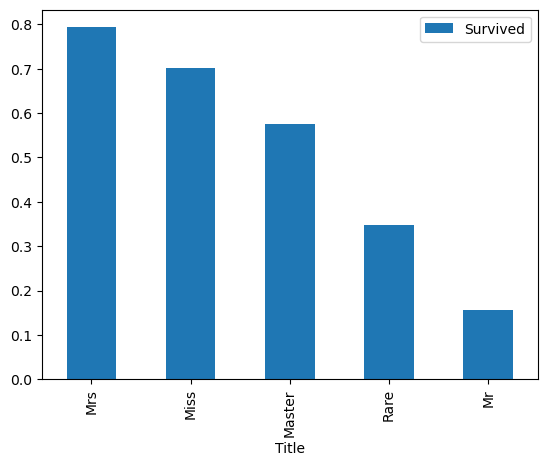

In [197]:
a = train_df[['Title','Survived']].groupby(['Title'], as_index=False).mean().sort_values(by='Survived', ascending=False)
a.plot('Title', kind='bar')

- 여성 호칭의 생존율이 남성 호칭보다 높음

### 3-1-5. AgeBand에 따른 생존율 비교

<AxesSubplot: xlabel='AgeBand'>

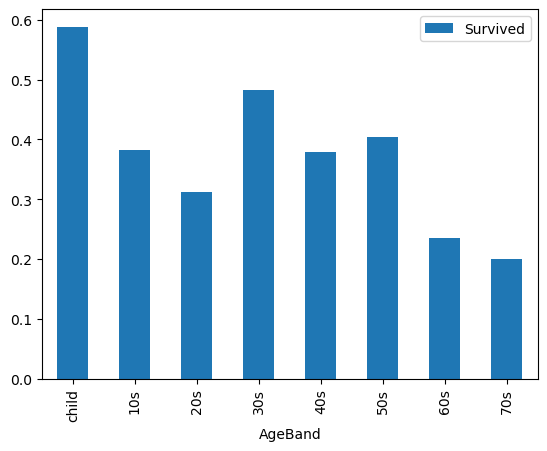

In [198]:
a = train_df[['AgeBand','Survived']].groupby(['AgeBand'], as_index=False).mean()
a.plot('AgeBand', kind='bar')

- 나이가 어릴 수록 생존률이 높음

### 3-1-6. Family(부양 가족수)에 따른 생존률 비교

<AxesSubplot: xlabel='Family'>

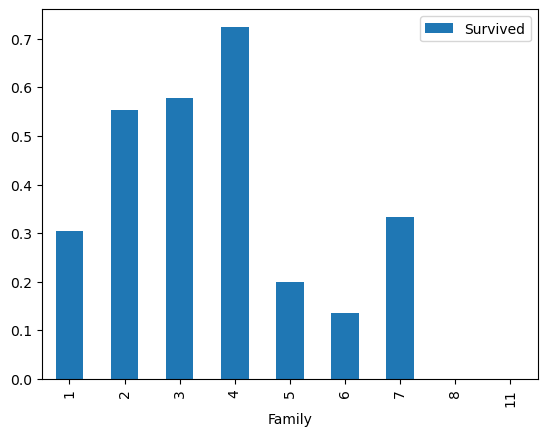

In [199]:
a = train_df[['Family','Survived']].groupby(['Family'], as_index=False).mean()
a.plot('Family', kind='bar')

- 부양 가족수는 아직 잘 모르겠음

### 3-1-7. Alone(혼자인 경우)에 따른 생존률 비교

<AxesSubplot: xlabel='Alone'>

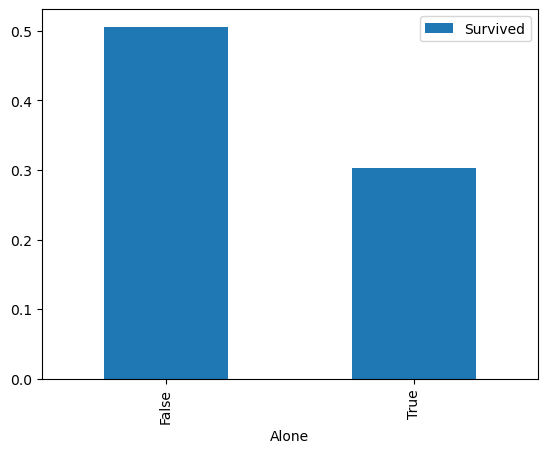

In [200]:
a = train_df[['Alone','Survived']].groupby(['Alone'], as_index=False).mean()
a.plot('Alone', kind='bar')

- 혼자가 아닌 경우 생존률이 높음

### 3-1-8. FareBand에 따른 생존율 비교

<AxesSubplot: xlabel='FareBand'>

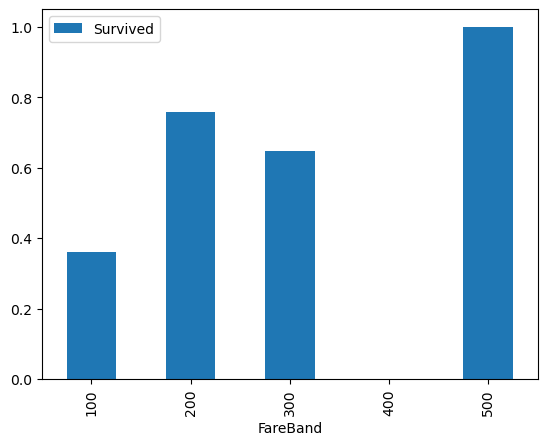

In [201]:
a = train_df[['FareBand','Survived']].groupby(['FareBand'], as_index=False).mean()
a.plot('FareBand', kind='bar')

- 요금이 높을 수록 생존률이 높음

# ※ 추가 전처리 및 csv로 저장
## 머신러닝 모델에 데이터 돌리기 위해서 각 컬럼별 값을 숫자(numeric)로 변환

In [16]:
print(train_df['Sex'].unique())
sex_mapping = {'male':1, 'female':2}
train_df['Sex'] = train_df['Sex'].map(sex_mapping).astype(int)
print(train_df['Sex'].unique())

['male' 'female']
[1 2]


In [17]:
print(train_df['Embarked'].unique())
embarked_mapping = {'S':1, 'C':2, 'Q':3}
train_df['Embarked'] = train_df['Embarked'].map(embarked_mapping).astype(int)
print(train_df['Embarked'].unique())

['S' 'C' 'Q']
[1 2 3]


In [18]:
print(train_df['Title'].unique())
new_mapping = {'Mr':1, 'Mrs':2, 'Miss':3, 'Master':4, 'Rare':5}
train_df['Title'] = train_df['Title'].map(new_mapping).astype(int)
print(train_df['Title'].unique())

['Mr' 'Mrs' 'Miss' 'Master' 'Rare']
[1 2 3 4 5]


In [19]:
print(train_df['AgeBand'].unique())
new_mapping = {'child':1, '10s':2, '20s':3, '30s':4, '40s':5, '50s':6, '60s':7, '70s':8}
train_df['AgeBand'] = train_df['AgeBand'].map(new_mapping).astype(int)
print(train_df['AgeBand'].unique())

['20s', '30s', '50s', 'child', '10s', '60s', '40s', '70s']
Categories (8, object): ['child' < '10s' < '20s' < '30s' < '40s' < '50s' < '60s' < '70s']
[3 4 6 1 2 7 5 8]


In [20]:
print(train_df['Alone'].unique())
new_mapping = {'Not Alone':0, 'Alone':1}
train_df['Alone'] = train_df['Alone'].map(new_mapping).astype(int)
print(train_df['Alone'].unique())

['Not Alone' 'Alone']
[0 1]


In [21]:
print(train_df['FareBand'].unique())
new_mapping = {'100':1, '200':2, '300':3, '400':4, '500':5}
train_df['FareBand'] = train_df['FareBand'].map(new_mapping).astype(int)
print(train_df['FareBand'].unique())

['100', '300', '200', '500']
Categories (5, object): ['100' < '200' < '300' < '400' < '500']
[1 3 2 5]


In [63]:
train_df.head()

,Survived,Pclass,Sex,Embarked,Title,AgeBand,Family,Alone,FareBand
0,0,3,1,1,1,3,2,0,1
1,1,1,2,2,2,4,2,0,1
2,1,3,2,1,3,3,1,1,1
3,1,1,2,1,2,4,2,0,1
4,0,3,1,1,1,4,1,1,1


In [22]:
# 최종 데이터 프레임 확인
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Survived  891 non-null    int64
 1   Pclass    891 non-null    int64
 2   Sex       891 non-null    int32
 3   Embarked  891 non-null    int32
 4   Title     891 non-null    int32
 5   AgeBand   891 non-null    int32
 6   Family    891 non-null    int64
 7   Alone     891 non-null    int32
 8   FareBand  891 non-null    int32
dtypes: int32(6), int64(3)
memory usage: 41.9 KB


- 학습용 데이터에는 최종 컬럼(특성)

|#|컬럼명|내용|설명|
|-|------|---|---|
|0|Survived     |생존 여부|0: 사망, 1: 생존|
|1|Pclass       |객실 등급|1, 2, 3|
|2|Sex          |성별|1: male, 2: female|
|3|Embarked     |승선 항구|1: Southampton, 2: Cherbourg, 3: Queenstown, |
|4|Title     |호칭|1: Mr, 2: Mrs, 3: Miss, 4: Master, 5: Rare|
|5|AgeBand     |연령대|1: child, 2: 10s, 3: 20s, 4: 30s, 5: 40s, 6: 50s, 7: 60s, 8: 70s|
|6|Family     |부양 가족 수||
|7|Alone     |혼자인 경우|0: Not Alone, 1: Alone|
|8|FareBand     |티켓 금액대|1: ~100, 2: ~200, 3: ~300, 4: ~400, 5: ~500|


In [65]:
# csv 파일로 저장
train_df.to_csv('./datas/train_df.csv')

In [68]:
new_train = pd.read_csv('./datas/train_df.csv', index_col=0)

In [69]:
new_train.head()

,Survived,Pclass,Sex,Embarked,Title,AgeBand,Family,Alone,FareBand
0,0,3,1,1,1,3,2,0,1
1,1,1,2,2,2,4,2,0,1
2,1,3,2,1,3,3,1,1,1
3,1,1,2,1,2,4,2,0,1
4,0,3,1,1,1,4,1,1,1
